In [41]:
import pandas as pd
data = pd.read_csv('D:/603021712-4/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
 'Normal Nucleoli', 'Mitoses','Class']
data = data.drop(['Sample code'],axis=1)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()


Number of instances = 699
Number of attributes = 10


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [42]:
import numpy as np
data = data.replace('?',np.NaN)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
print('Number of missing values:')
for col in data.columns:
 print('\t%s: %d' % (col,data[col].isna().sum()))


Number of instances = 699
Number of attributes = 10
Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


In [43]:
import numpy as np
data = data.replace('?',np.NaN)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
print('Number of missing values:')
for col in data.columns:
 print('\t%s: %d' % (col,data[col].isna().sum()))


Number of instances = 699
Number of attributes = 10
Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


In [44]:
data1=data
data1 = data1.fillna(data1.median())
print('\nAfter replacing missing values:')


After replacing missing values:


In [45]:
print(data1[20:25])

    Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
20                7                        3                         2   
21               10                        5                         5   
22                3                        1                         1   
23                8                        4                         5   
24                1                        1                         1   

    Marginal Adhesion  Single Epithelial Cell Size Bare Nuclei  \
20                 10                            5          10   
21                  3                            6           7   
22                  1                            2           1   
23                  1                            2           1   
24                  1                            2           1   

    Bland Chromatin  Normal Nucleoli  Mitoses  Class  
20                5                4        4      4  
21                7               10        1   

In [46]:
print('Number of rows in original data = %d' % (data.shape[0]))
data2 = data.dropna()
print('Number of rows after discarding missing values = %d' % (data2.shape[0]))

Number of rows in original data = 699
Number of rows after discarding missing values = 683


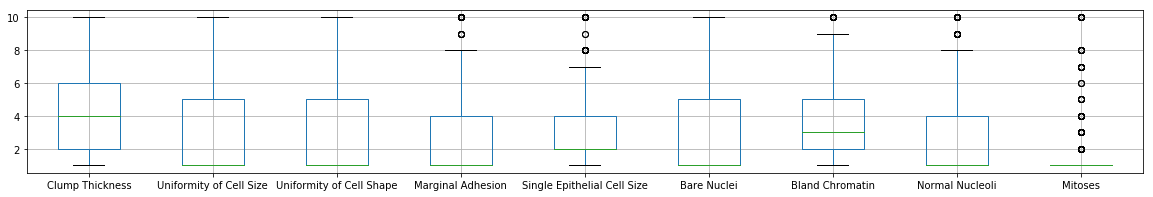

In [47]:
%matplotlib inline
data_box_data1 = data1.drop(['Class'],axis=1)
data_box_data1['Bare Nuclei'] = pd.to_numeric(data_box_data1['Bare Nuclei'])
data_box_data1.boxplot(figsize=(20,3))

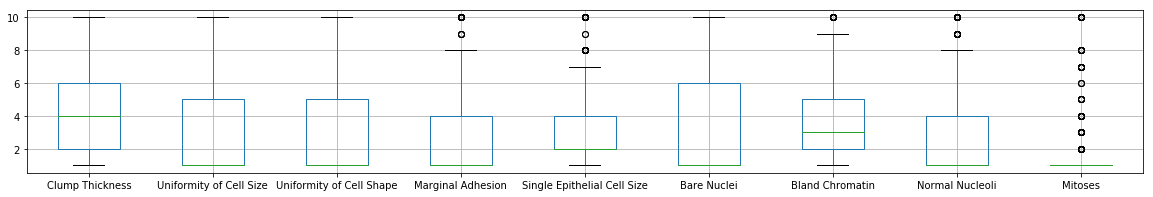

In [48]:
%matplotlib inline
data_box_data2 = data2.drop(['Class'],axis=1)
data_box_data2['Bare Nuclei'] = pd.to_numeric(data_box_data2['Bare Nuclei'])
data_box_data2.boxplot(figsize=(20,3))

In [67]:
Z_data1 = (data_box_data1-data1.mean())/data1.std()
Z_data1[20:25]
Z_data2 = (data_box_data2-data2.mean())/data2.std()
Z_data2[20:25]
Z1 = Z_data1.loc[((Z_data1 > -3).sum(axis=1)==10) & ((Z_data1 <= 3).sum(axis=1)==10),:]
print('Number of rows = %d' % (Z1.shape[0]))
Z2 = Z_data2.loc[((Z_data2 > -3).sum(axis=1)==10) & ((Z_data2 <= 3).sum(axis=1)==10),:]
print('Number of rows = %d' % (Z2.shape[0]))

Number of rows = 0
Number of rows = 0


In [68]:
data1_x = data1.drop(['Class'],axis=1)
print('Number of instances = %d' % (data1_x.shape[0]))
print('Number of attributes = %d' % (data1_x.shape[1]))
data1_x.head()
data1_y = data1['Class']
print('Number of instances = %d' % (data1_y.shape[0]))

Number of instances = 699
Number of attributes = 9
Number of instances = 699


In [69]:
data1_y.head()
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data1_x, data1_y, test_size = 0.2,random_state = 0)

Text(0, 0.5, 'Accuracy')

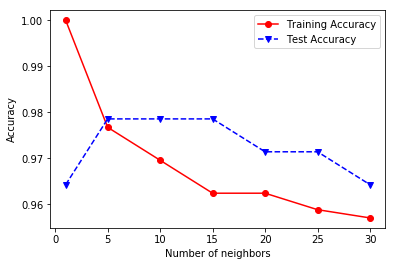

In [70]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc_knnd1 = []
testAcc_knnd1 = []
for k in numNeighbors:
 clf_knnd1 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
 clf_knnd1.fit(X_train, Y_train)
 Y_predTrain_knnd1 = clf_knnd1.predict(X_train)
 Y_predTest_knnd1 = clf_knnd1.predict(X_test)
 trainAcc_knnd1.append(accuracy_score(Y_train, Y_predTrain_knnd1))
 testAcc_knnd1.append(accuracy_score(Y_test, Y_predTest_knnd1))
plt.plot(numNeighbors, trainAcc_knnd1, 'ro-', numNeighbors, testAcc_knnd1,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy') 

In [71]:
data2_x = data2.drop(['Class'],axis=1)
print('Number of instances = %d' % (data2_x.shape[0]))
print('Number of attributes = %d' % (data2_x.shape[1]))
data2_x.head()
data2_y = data2['Class']
print('Number of instances = %d' % (data2_y.shape[0]))

Number of instances = 683
Number of attributes = 9
Number of instances = 683


In [72]:
data2_y.head()
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data2_x, data2_y, test_size = 0.2,random_state = 0)

Text(0, 0.5, 'Accuracy')

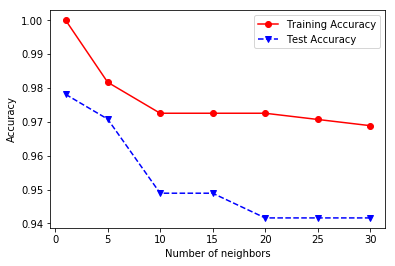

In [73]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc_knnd2 = []
testAcc_knnd2 = []
for k in numNeighbors:
 clf_knnd2 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
 clf_knnd2.fit(X_train, Y_train)
 Y_predTrain_knnd2 = clf_knnd2.predict(X_train)
 Y_predTest_knnd2 = clf_knnd2.predict(X_test)
 trainAcc_knnd2.append(accuracy_score(Y_train, Y_predTrain_knnd2))
 testAcc_knnd2.append(accuracy_score(Y_test, Y_predTest_knnd2))
plt.plot(numNeighbors, trainAcc_knnd2, 'ro-', numNeighbors, testAcc_knnd2,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy') 